# Performance Metrics for Classification Problems

Using the MNIST dataset, multiclass classification is performed, and the model will be evaluated using various performance metrics.

## 1. Download the MNIST data

In [143]:
import numpy as np
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.linear_model import SGDClassifier

In [144]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

## 2. Run an EDA

Print the keys and description of the MNIST dataset

In [145]:
print(list(mnist))
print(mnist.DESCR)

['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the an

In [146]:
# data
print(mnist.data.shape)
print(mnist.data[0])
# target
print(mnist.target.shape)
print(mnist.target)

(70000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

- The MNIST dataset consists of 70,000 data points, each with 784 features (28 x 28).
- Each data point represents the pixel values of a 28 x 28 image.
- The target of the data is digits ranging from 0 to 9.

Compare the results of printing the train data as images with their target class values

In [147]:
X = mnist.data
y = mnist.target

In [148]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

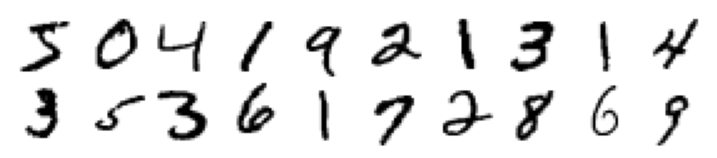

In [150]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:20]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [151]:
y[:20]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9'], dtype=object)

Check the distribution of data according to the target class values

<Axes: xlabel='class', ylabel='count'>

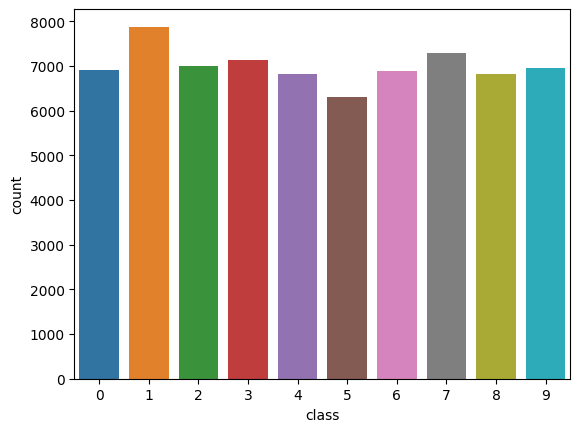

In [152]:
y_values, counts = np.unique(y, return_counts=True)
df_y = pd.DataFrame({'class': y_values, 'count': counts})
sns.barplot(df_y, x="class", y="count")

Each class (0-9) has approximately 7,000 pieces of data, and it can be observed that the data is relatively evenly distributed across the classes.

## 3. Choose the number of classes you want to have

- The original MNIST set contains classes representing digits from 0 to 9
- Train and evaluate a model for classifying these 10 classes

## 4. Split the dataset to train-validation-test

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

The entire dataset (70000) is divided into 70% for the training set (49000), 15% for the validation set (10500), and 15% for the test set (10500).

## 5. Choose a model from a Kaggle notebook, and fit it.

reference: https://www.kaggle.com/code/amirdhavarshinis/mnist-digit-recognizer

In [157]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train) 

SGDClassifier(random_state=42)

For multiclass classification, the Stochastic Gradient Descent (SGD) classifier model was chosen for training.

## 6. Run an evaluation on the validation dataset

### Accuracy

In [183]:
from sklearn.metrics import accuracy_score

y_pred_val = model.predict(X_val)

accuracy_score(y_val, y_pred_val)

0.8637142857142858

### Confusion Matrix

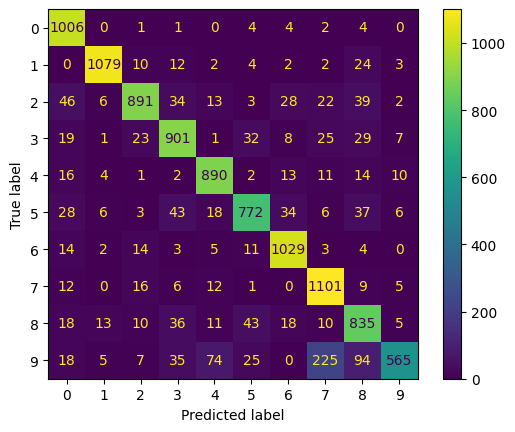

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Precision, recall and F1 for each class

In [185]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_val, target_names=y_values))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1022
           1       0.97      0.95      0.96      1138
           2       0.91      0.82      0.87      1084
           3       0.84      0.86      0.85      1046
           4       0.87      0.92      0.89       963
           5       0.86      0.81      0.83       953
           6       0.91      0.95      0.93      1085
           7       0.78      0.95      0.86      1162
           8       0.77      0.84      0.80       999
           9       0.94      0.54      0.68      1048

    accuracy                           0.86     10500
   macro avg       0.87      0.86      0.86     10500
weighted avg       0.87      0.86      0.86     10500



### Precision-recall curve for one class of your choice vs. all others

Chosen class: 5

In [186]:
from sklearn.metrics import precision_recall_curve

y_scores = model.decision_function(X_val)
y_scores_5 = y_scores[:, 5]
y_val_5 = (y_val == '5').astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_val_5, y_scores_5)

print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.0907619  0.09077055 0.0907792  0.09078784 0.09079649]
[1. 1. 1. 1. 1.]
[-76451.2213284  -66278.68730287 -63306.74198067 -61744.03821257
 -59944.77423812]


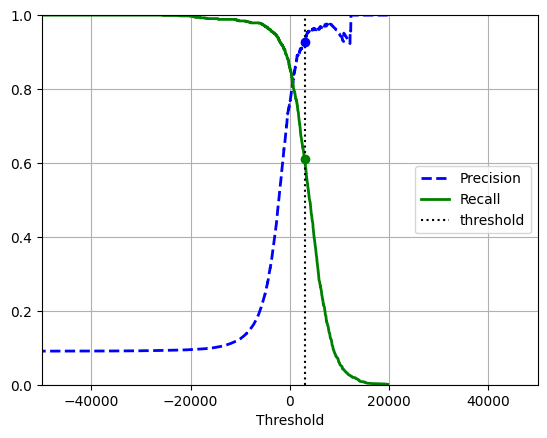

In [187]:
threshold = 3000
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

### Provide insights

1. Model Accuracy
- In multiclass classification, (Accuracy) = (correct classification) / (all classification)
- This SGD classifier model has an accuracy of approximately 0.86, which means that out of the 10,500 pieces of data in the validation set, about 9,061 were successfully classified.

2. Confusion Matrix
- From the confusion matrix, by examining the diagonal values, one can determine how many instances of each predicted class match the actual class.
- For example, in cases where the digit is predicted to be 7, there are as many as 225 instances where the actual value is 9, indicating that the performance in predicting 7 is relatively low.

3. Precision
- (Precision) = (True Positives) / (True Positives + False Positives) or (Relavant retrieved instaces) / (All retrieved instances)
- From the perspective of precision, the performance in classifying 1 and 9 is the best with scores of 0.97 and 0.94, respectively, while the performance in classifying 8 and 7 is the poorest with scores of 0.77 and 0.78, respectively.

4. Recall
- (Recall) = (Ture Positives) = (True Positives + False Negatives) or (Relevant retrieved instances) / (All relevant instances)
- From the perspective of recall, the performance in classifying 0 is the best with a score of 0.98, while the performance in classifying 9 is the worst with a score of 0.54.

5. The performance of classifying class 5
- precision: 0.86 / recall: 0.81
- As can be seen from the precision-recall curve, lowering the threshold results in a decrease in precision and an increase in recall, while raising the threshold leads to an increase in precision and a decrease in recall.

## 7. Increase precision/recall for your chosen class without retraining the model

### Increase precision

In [193]:
from sklearn.metrics import precision_score, recall_score

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print('threshold for 90% precision: ', threshold_for_90_precision)

y_val_pred_90 = (y_scores_5 >= threshold_for_90_precision)
print('precision score: ', precision_score(y_val_5, y_val_pred_90))
print('recall score: ', recall_score(y_val_5, y_val_pred_90))

threshold for 90% precision:  1999.6912297895738
precision score:  0.9009370816599732
recall score:  0.7061909758656874


By raising the threshold, the precision score was increased from 0.86 to 0.90. Conversely, the recall decreased from 0.81 to 0.71.

### Increase recall

In [194]:
from sklearn.metrics import precision_score, recall_score

idx_for_90_recall = (recalls >= 0.90).argmin() - 1
threshold_for_90_recall = thresholds[idx_for_90_recall]
print('threshold for 90% recall: ', threshold_for_90_recall)

y_val_pred_90 = (y_scores_5 >= threshold_for_90_recall)
print('precision score: ', precision_score(y_val_5, y_val_pred_90))
print('recall score: ', recall_score(y_val_5, y_val_pred_90))

threshold for 90% recall:  -900.0644874267889
precision score:  0.667704280155642
recall score:  0.9003147953830011


By lowering the threshold, the recall was increased from 0.81 to 0.90. Conversely, the precision decreased from 0.86 to 0.67.

## 8. Run on the test set, and provide your conclusions

In [190]:
y_pred_test = model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8686666666666667

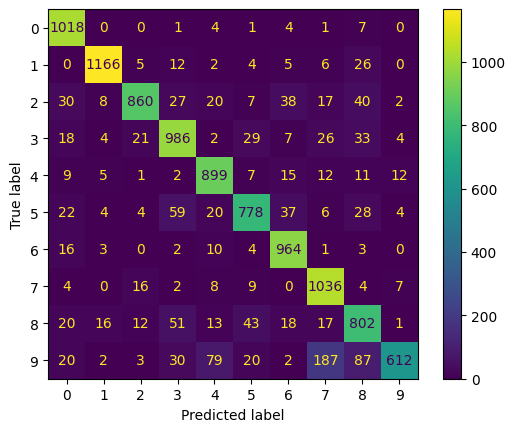

In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [192]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=y_values))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1036
           1       0.97      0.95      0.96      1226
           2       0.93      0.82      0.87      1049
           3       0.84      0.87      0.86      1130
           4       0.85      0.92      0.89       973
           5       0.86      0.81      0.83       962
           6       0.88      0.96      0.92      1003
           7       0.79      0.95      0.87      1086
           8       0.77      0.81      0.79       993
           9       0.95      0.59      0.73      1042

    accuracy                           0.87     10500
   macro avg       0.87      0.87      0.86     10500
weighted avg       0.87      0.87      0.87     10500



### Conclusion

- The accuracy is approximately 0.87
- The highest precision: 0.97 (class 1) / The lowest precision: 0.77 (class 8)
- The highest recall: 0.98 (class 0) / The lowest recall: 0.59 (class 9)
- Generally, this model has the capability to correctly classify digits from 0 to 9 in 87 percent of the test data
- This classification model can be considered poor in terms of precision for classifying 7 and 8, with performance below 80%.
- From the perspective of recall, the performance in classifying 9 is notably low, below 60%. In all other cases, it demonstrates a performance above 80%.